In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Data loading and Pre-processing

In [3]:
# Data Import
df = pd.read_csv("Student Mental health.csv")
df.head()

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [4]:
df.shape

(101, 11)

In [30]:
df.isna().sum()

Timestamp         0
Gender            0
Age               0
Course            0
Current Year      0
CGPA              0
Marital status    0
Depression        0
Anxiety           0
Panic Attack      0
Treatment         0
Year              0
dtype: int64

In [6]:
df = df.dropna(how='any',axis=0) 

In [7]:
df.head(3)

,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No


In [8]:
df.rename(columns = {'Choose your gender':'Gender', 'What is your course?':'Course',
                     'Your current year of Study':'Current Year', 'What is your CGPA?':'CGPA',
                    'Do you have Depression?':'Depression', 'Do you have Anxiety?':'Anxiety',
                    'Do you have Panic attack?':'Panic Attack', 'Did you seek any specialist for a treatment?':'Treatment'}, inplace = True)
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Year'] = df['Timestamp'].dt.year
#df['month'] = df['Timestamp'].dt.month
#df['day'] = df['Timestamp'].dt.day
#df['hour'] = df['Timestamp'].dt.hour
#df['minute'] = df['Timestamp'].dt.minute
#df['second'] = df['Timestamp'].dt.second
df.head(3)

,Timestamp,Gender,Age,Course,Current Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment,Year
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020
1,2020-08-07 12:04:00,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020
2,2020-08-07 12:05:00,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020


In [9]:
df['CGPA'].value_counts()

3.50 - 4.00     47
3.00 - 3.49     43
2.50 - 2.99      4
0 - 1.99         3
2.00 - 2.49      2
3.50 - 4.00      1
Name: CGPA, dtype: int64

In [10]:
df.replace({'3.50 - 4.00 ':'3.50 - 4.00'},regex=True,inplace=True)
df["CGPA"].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

In [11]:
df['Course'].value_counts()

BCS                        18
Engineering                17
BIT                         9
Biomedical science          4
KOE                         4
BENL                        2
Laws                        2
psychology                  2
Engine                      2
Islamic Education           1
Biotechnology               1
engin                       1
Econs                       1
MHSC                        1
Malcom                      1
Kop                         1
Human Sciences              1
Communication               1
Nursing                     1
Diploma Nursing             1
IT                          1
Pendidikan Islam            1
Radiography                 1
Fiqh fatwa                  1
DIPLOMA TESL                1
Koe                         1
Fiqh                        1
CTS                         1
koe                         1
Benl                        1
Kirkhs                      1
Mathemathics                1
Pendidikan islam            1
Human Reso

In [12]:
df["Course"].unique()

array(['Engineering', 'Islamic education', 'BIT', 'Laws', 'Mathemathics',
       'Pendidikan islam', 'BCS', 'Human Resources', 'Irkhs',
       'Psychology', 'KENMS', 'Accounting ', 'ENM', 'Marine science',
       'KOE', 'Banking Studies', 'Business Administration', 'Law',
       'KIRKHS', 'Usuluddin ', 'TAASL', 'Engine', 'ALA',
       'Biomedical science', 'koe', 'Kirkhs', 'BENL', 'Benl', 'IT', 'CTS',
       'engin', 'Econs', 'MHSC', 'Malcom', 'Kop', 'Human Sciences ',
       'Biotechnology', 'Communication ', 'Diploma Nursing',
       'Pendidikan Islam ', 'Radiography', 'psychology', 'Fiqh fatwa ',
       'DIPLOMA TESL', 'Koe', 'Fiqh', 'Islamic Education', 'Nursing ',
       'Pendidikan Islam'], dtype=object)

In [13]:
df.replace({'Laws':'Law', 'BIT':'IT', 'Benl':'BENL', 'Nursing ': 'Nursing', 'Diploma Nursing':'Nursing', 
            'psychology':'Psychology','engin':'Engine', 'Islamic education':'Islamic Education', 
            'Pendidikan islam':'Islamic Education', 'KENMS':'Islamic Education', 'KOE':'Islamic Education', 
            'KIRKHS':'Islamic Education', 'Usuluddin ':'Islamic Education', 'TAASL':'Islamic Education', 
            'ALA':'Islamic Education', 'koe':'Islamic Education', 'Kirkhs':'Islamic Education', 
            'Malcom':'Islamic Education', '':'Islamic Education', 'Kop':'Islamic Education',
            'Pendidikan Islam ':'Islamic Education', 'Fiqh fatwa ':'Islamic Education', 
            'Koe':'Islamic Education', 'Fiqh':'Islamic Education', 'Pendidikan Islam':'Islamic Education', 
            'Irkhs':'Islamic Education'},regex=True,inplace=True)
df["Course"].unique()

array(['Engineering', 'Islamic Education', 'IT', 'Law', 'Mathemathics',
       'BCS', 'Human Resources', 'Psychology', 'Accounting ', 'ENM',
       'Marine science', 'Banking Studies', 'Business Administration',
       'Engine', 'Biomedical science', 'BENL', 'CTS', 'Econs', 'MHSC',
       'Human Sciences ', 'Biotechnology', 'Communication ', 'Nursing',
       'Radiography', 'DIPLOMA TESL'], dtype=object)

In [14]:
df.loc[~df['CGPA'].isin(['3.50 - 4.00'])]

,Timestamp,Gender,Age,Course,Current Year,CGPA,Marital status,Depression,Anxiety,Panic Attack,Treatment,Year
0,2020-08-07 12:02:00,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No,2020
1,2020-08-07 12:04:00,Male,21.0,Islamic Education,year 2,3.00 - 3.49,No,No,Yes,No,No,2020
2,2020-08-07 12:05:00,Male,19.0,IT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No,2020
3,2020-08-07 12:06:00,Female,22.0,Law,year 3,3.00 - 3.49,Yes,Yes,No,No,No,2020
4,2020-08-07 12:13:00,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No,2020
8,2020-08-07 12:35:00,Female,19.0,Human Resources,Year 2,2.50 - 2.99,No,No,No,No,No,2020
12,2020-08-07 12:40:00,Female,18.0,BCS,year 1,3.00 - 3.49,No,Yes,No,No,No,2020
13,2020-08-07 12:41:00,Male,19.0,Engineering,year 1,3.00 - 3.49,No,No,No,No,No,2020
16,2020-08-07 12:46:00,Female,24.0,Accounting,year 3,3.00 - 3.49,No,No,No,No,No,2020
17,2020-08-07 12:52:00,Female,24.0,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,Yes,No,2020


In [15]:
df.loc[df['CGPA']=='3.50 - 4.00'].size

576

# Data Visulization

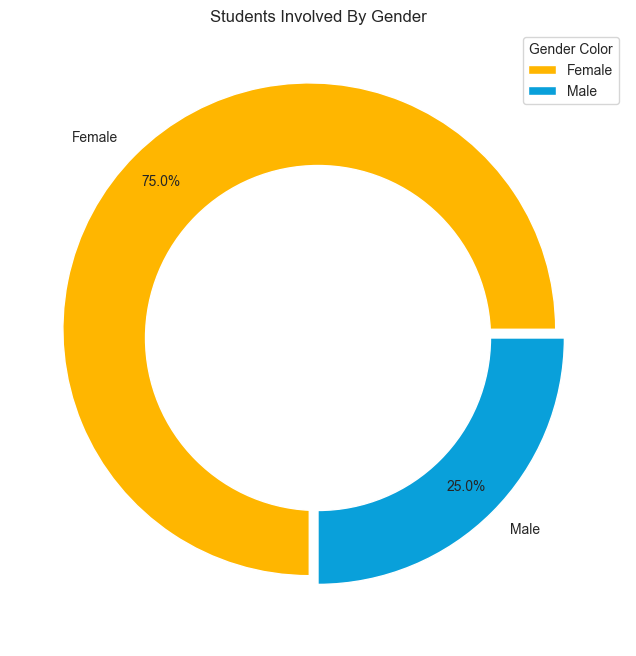

In [16]:
plt.figure(figsize=(8, 8)) # change the size of a figure

# Pie Chart
plt.pie(df['Gender'].value_counts(), colors=['#FFB600', '#09A0DA'], 
        labels=df['Gender'].value_counts().index, autopct='%1.1f%%', 
        pctdistance=0.85, explode=(0.05,0.0))
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Students Involved By Gender')
  
# Add Legends
plt.legend(df['Gender'].value_counts().index, loc="upper right", title="Gender Color")
  
# Displaying Chart
plt.show()

Text(0.5, 1.0, 'Students Involved By Gender')

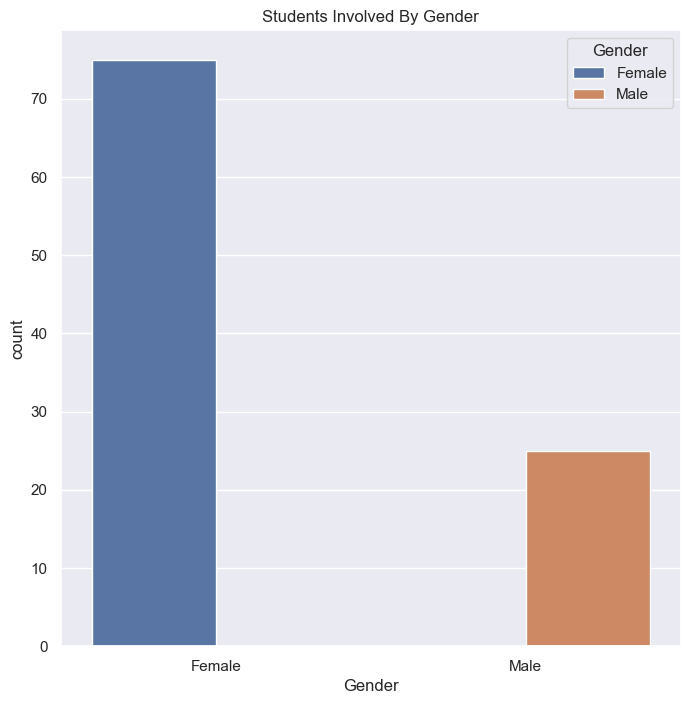

In [17]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Gender", hue="Gender", data=df)
plt.title("Students Involved By Gender")

Text(0.5, 1.0, 'Students Pursuing Status')

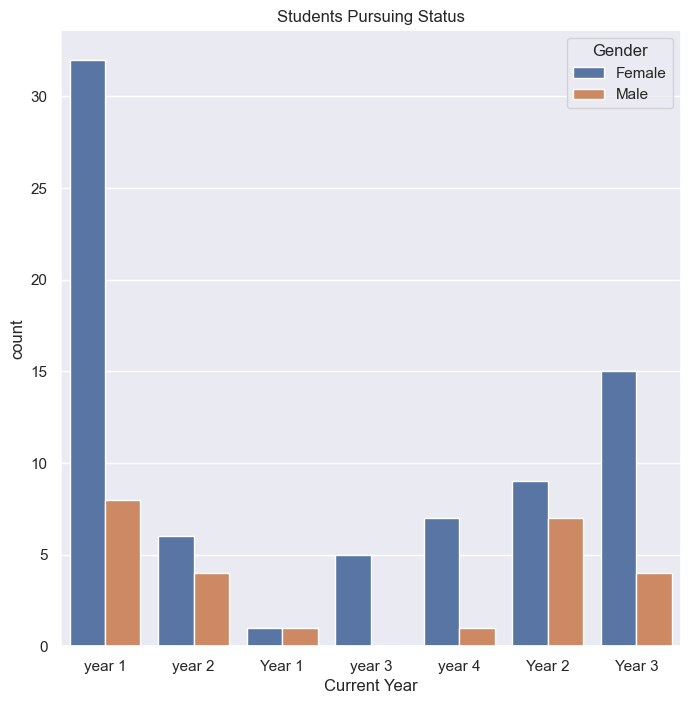

In [18]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Current Year", hue="Gender", data=df)
plt.title("Students Pursuing Status")

Text(0.5, 1.0, 'Students Involved For Treatment')

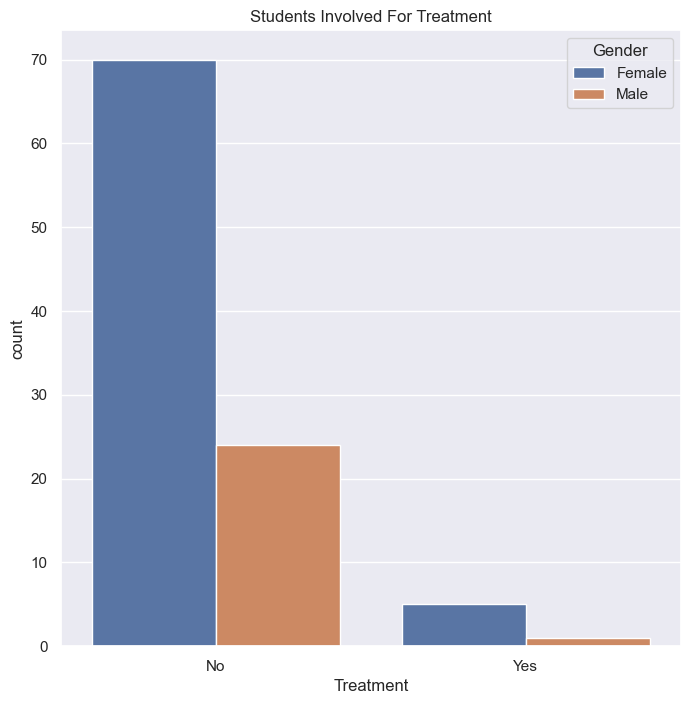

In [19]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Treatment", hue="Gender", data=df)
plt.title("Students Involved For Treatment")

Text(0.5, 1.0, 'Students Age')

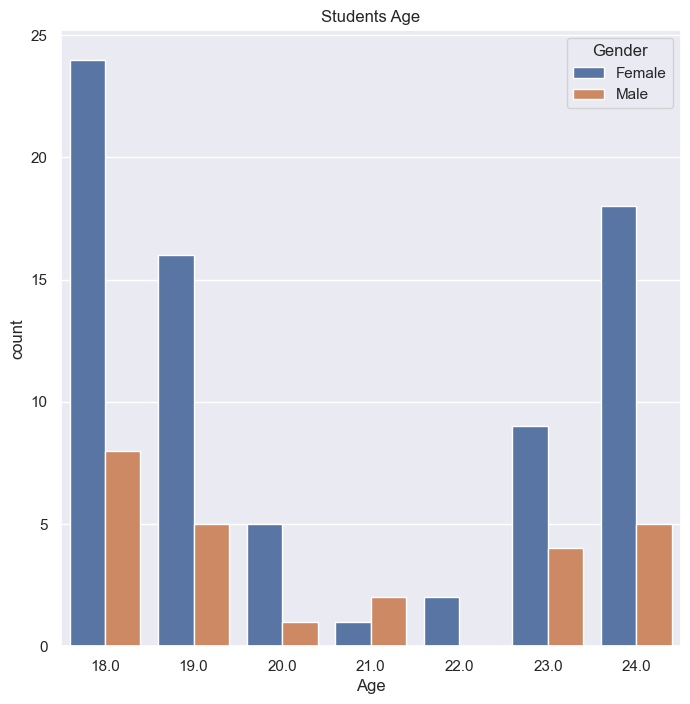

In [20]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Age", hue="Gender", data=df)
plt.title("Students Age")

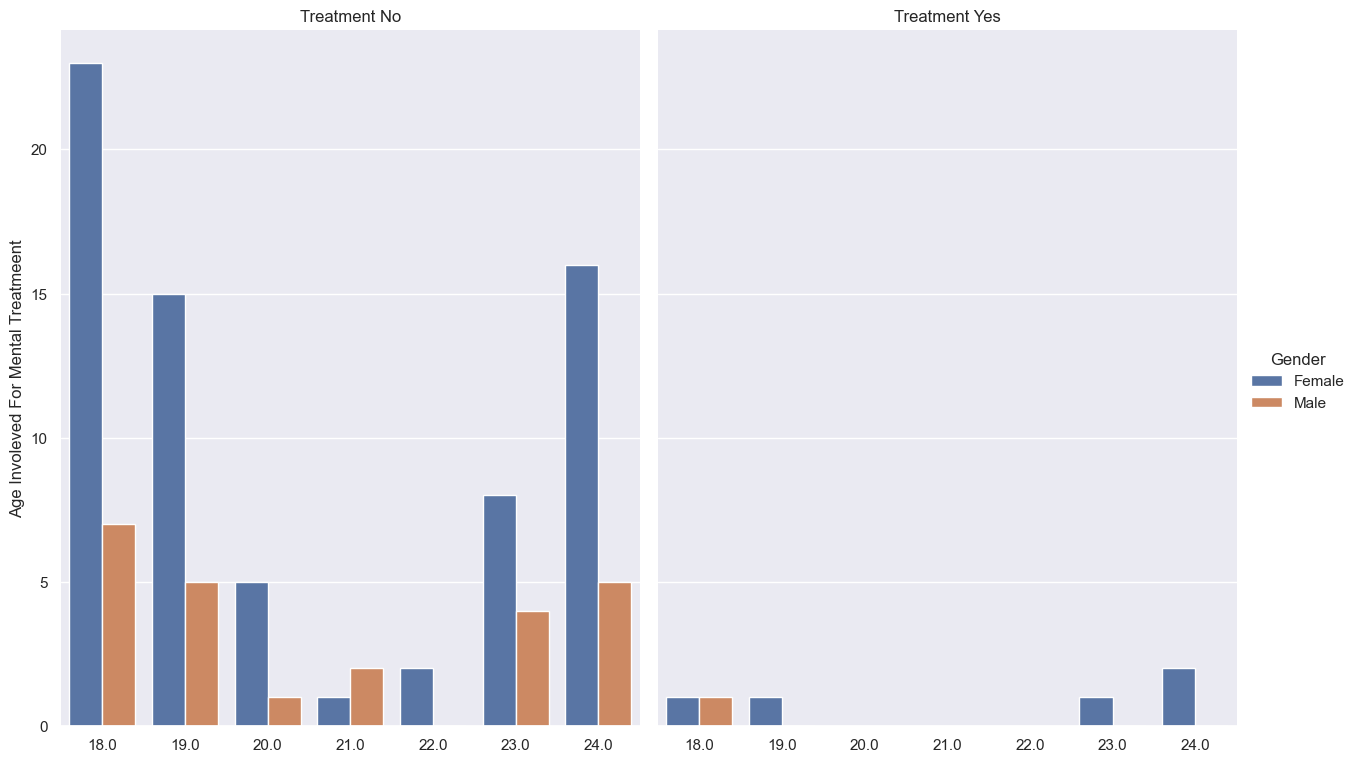

In [21]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(x="Age", hue="Gender", col="Treatment",
                data=df, kind="count", height=8, aspect=.79);
(ax.set_axis_labels("", "Age Involeved For Mental Treatmeent")
  .set_titles("{col_var} {col_name}")
  .despine(left=True))  

Text(0.5, 1.0, 'Depression by Gender')

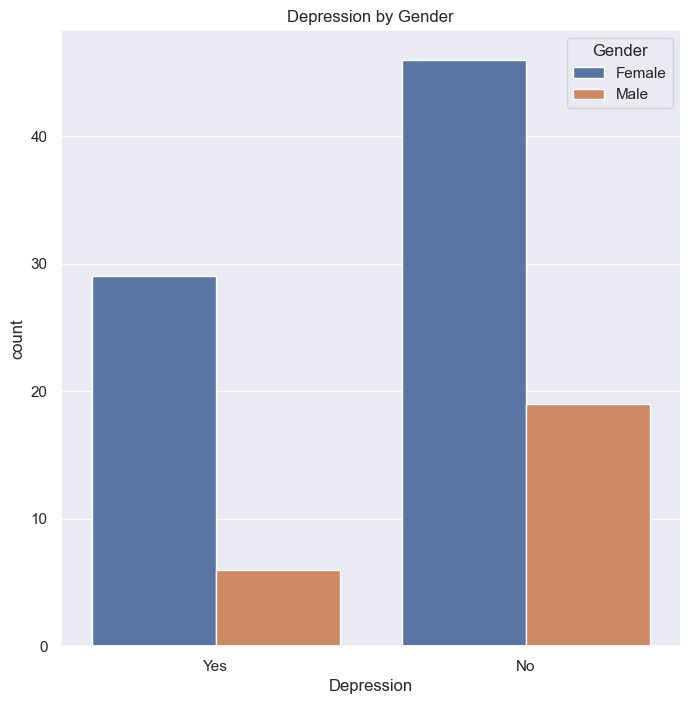

In [22]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Depression", hue="Gender", data=df)
plt.title("Depression by Gender")

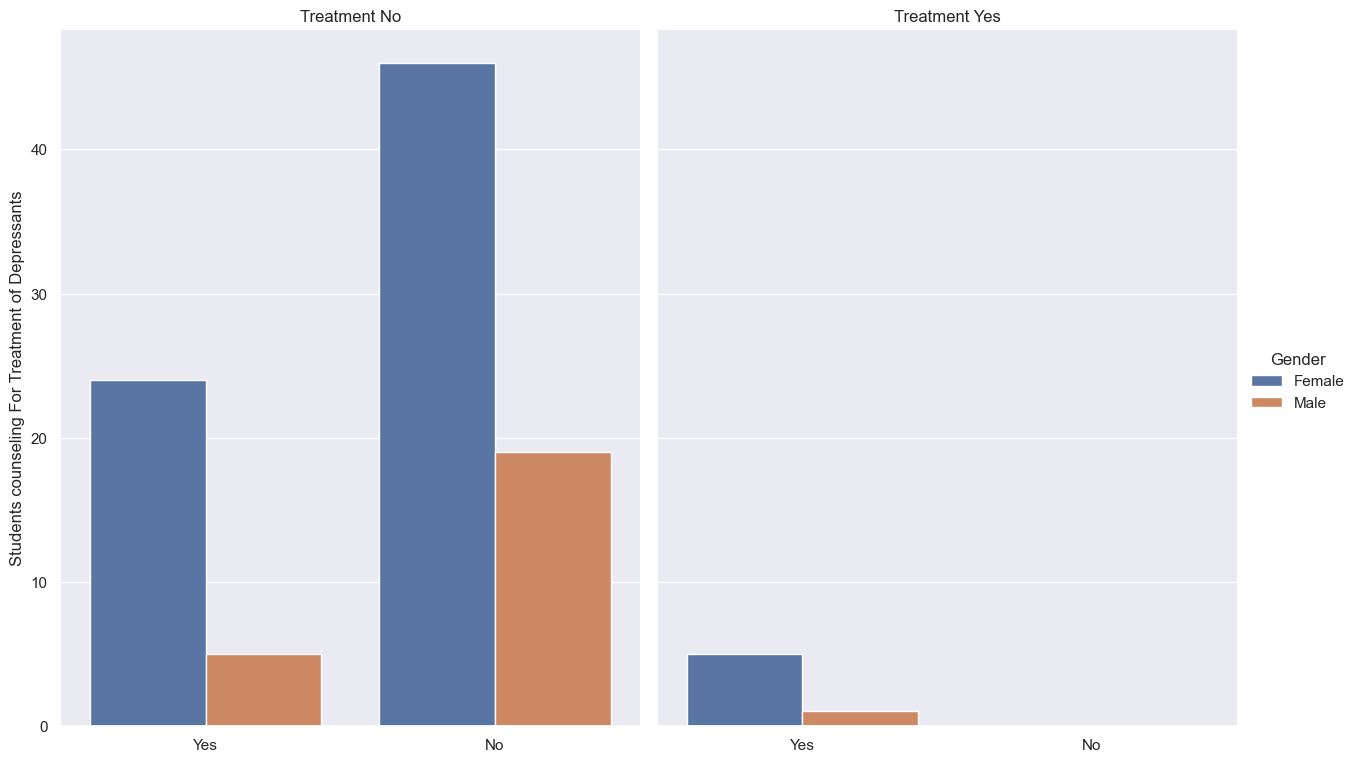

In [23]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(x="Depression", hue="Gender", col="Treatment",
                data=df, kind="count", height=8, aspect=.79);
(ax.set_axis_labels("", "Students counseling For Treatment of Depressants")
  .set_titles("{col_var} {col_name}")
  .despine(left=True)) 

Text(0.5, 1.0, 'Depression by Gender')

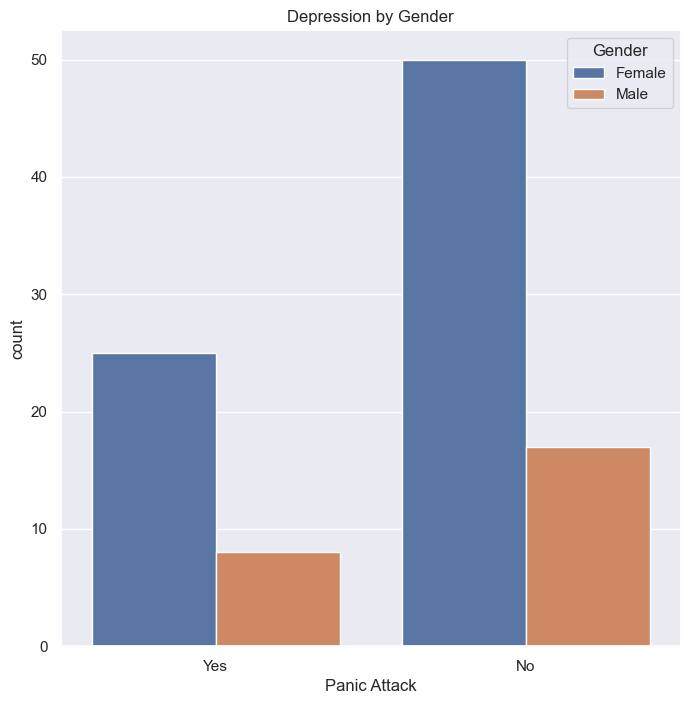

In [24]:
plt.figure(figsize=(8,8))
sns.set_theme(style="darkgrid")
ax = sns.countplot(x="Panic Attack", hue="Gender", data=df)
plt.title("Depression by Gender")

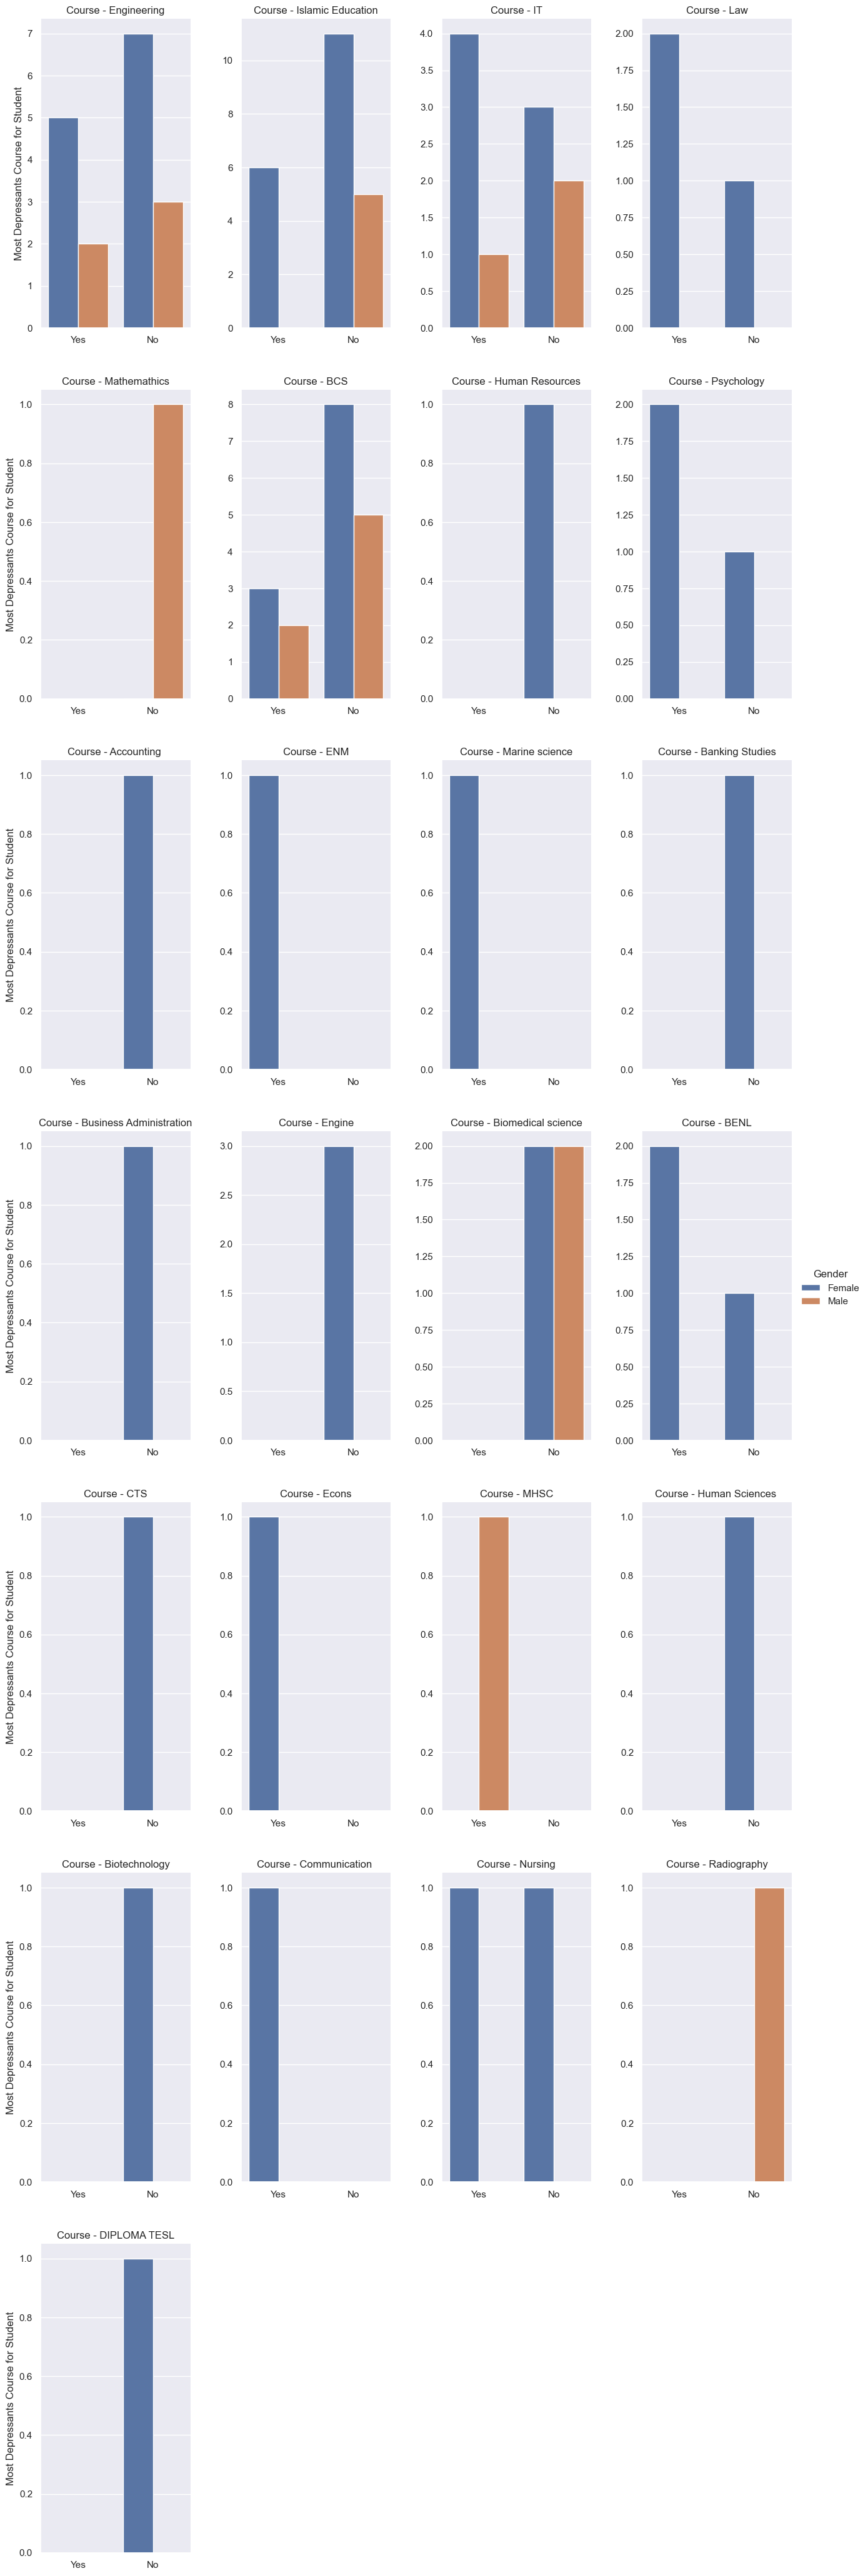

In [25]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(x="Depression", col="Course", col_wrap=4, capsize=.2, 
                hue="Gender", data=df, row_order=8,
                kind="count", sharey=False, height=6.5, aspect=.5) 
(ax.set_axis_labels("", "Most Depressants Course for Student")
  .set_titles("{col_var} - {col_name}")) 
for ax in ax.axes:
    ax.set_xticklabels(['Yes', 'No'], rotation=0)
    ax.tick_params(labelbottom=True)
plt.subplots_adjust(bottom=0.1, left=0.06, hspace=0.2)
plt.show()

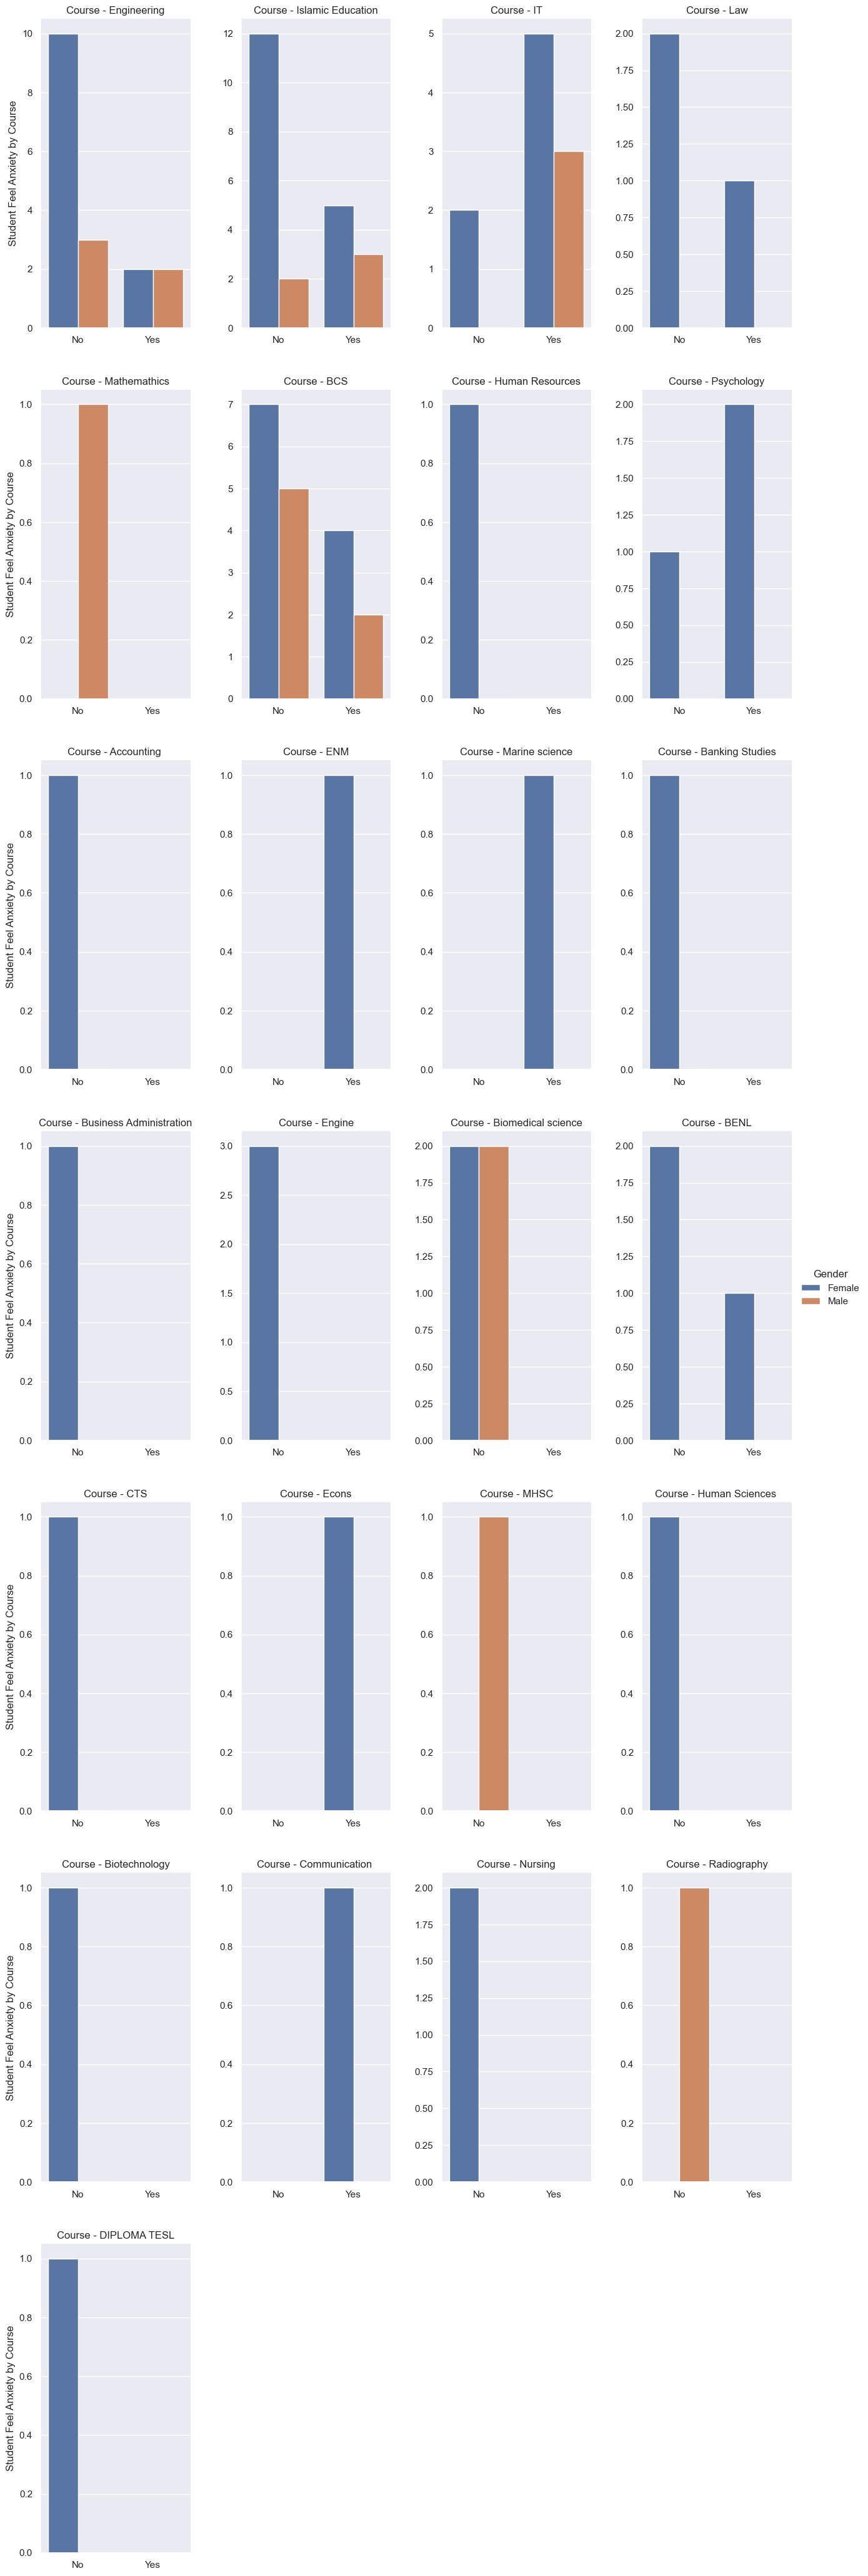

In [26]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(x="Anxiety", col="Course", col_wrap=4, capsize=.2, 
                hue="Gender", data=df, row_order=8,
                kind="count", sharey=False, height=6.5, aspect=.5) 
(ax.set_axis_labels("", "Student Feel Anxiety by Course")
  .set_titles("{col_var} - {col_name}")) 
for ax in ax.axes:
    ax.set_xticklabels(['No', 'Yes'], rotation=0)
    ax.tick_params(labelbottom=True)
plt.subplots_adjust(bottom=0.1, left=0.06, hspace=0.2)
plt.show()

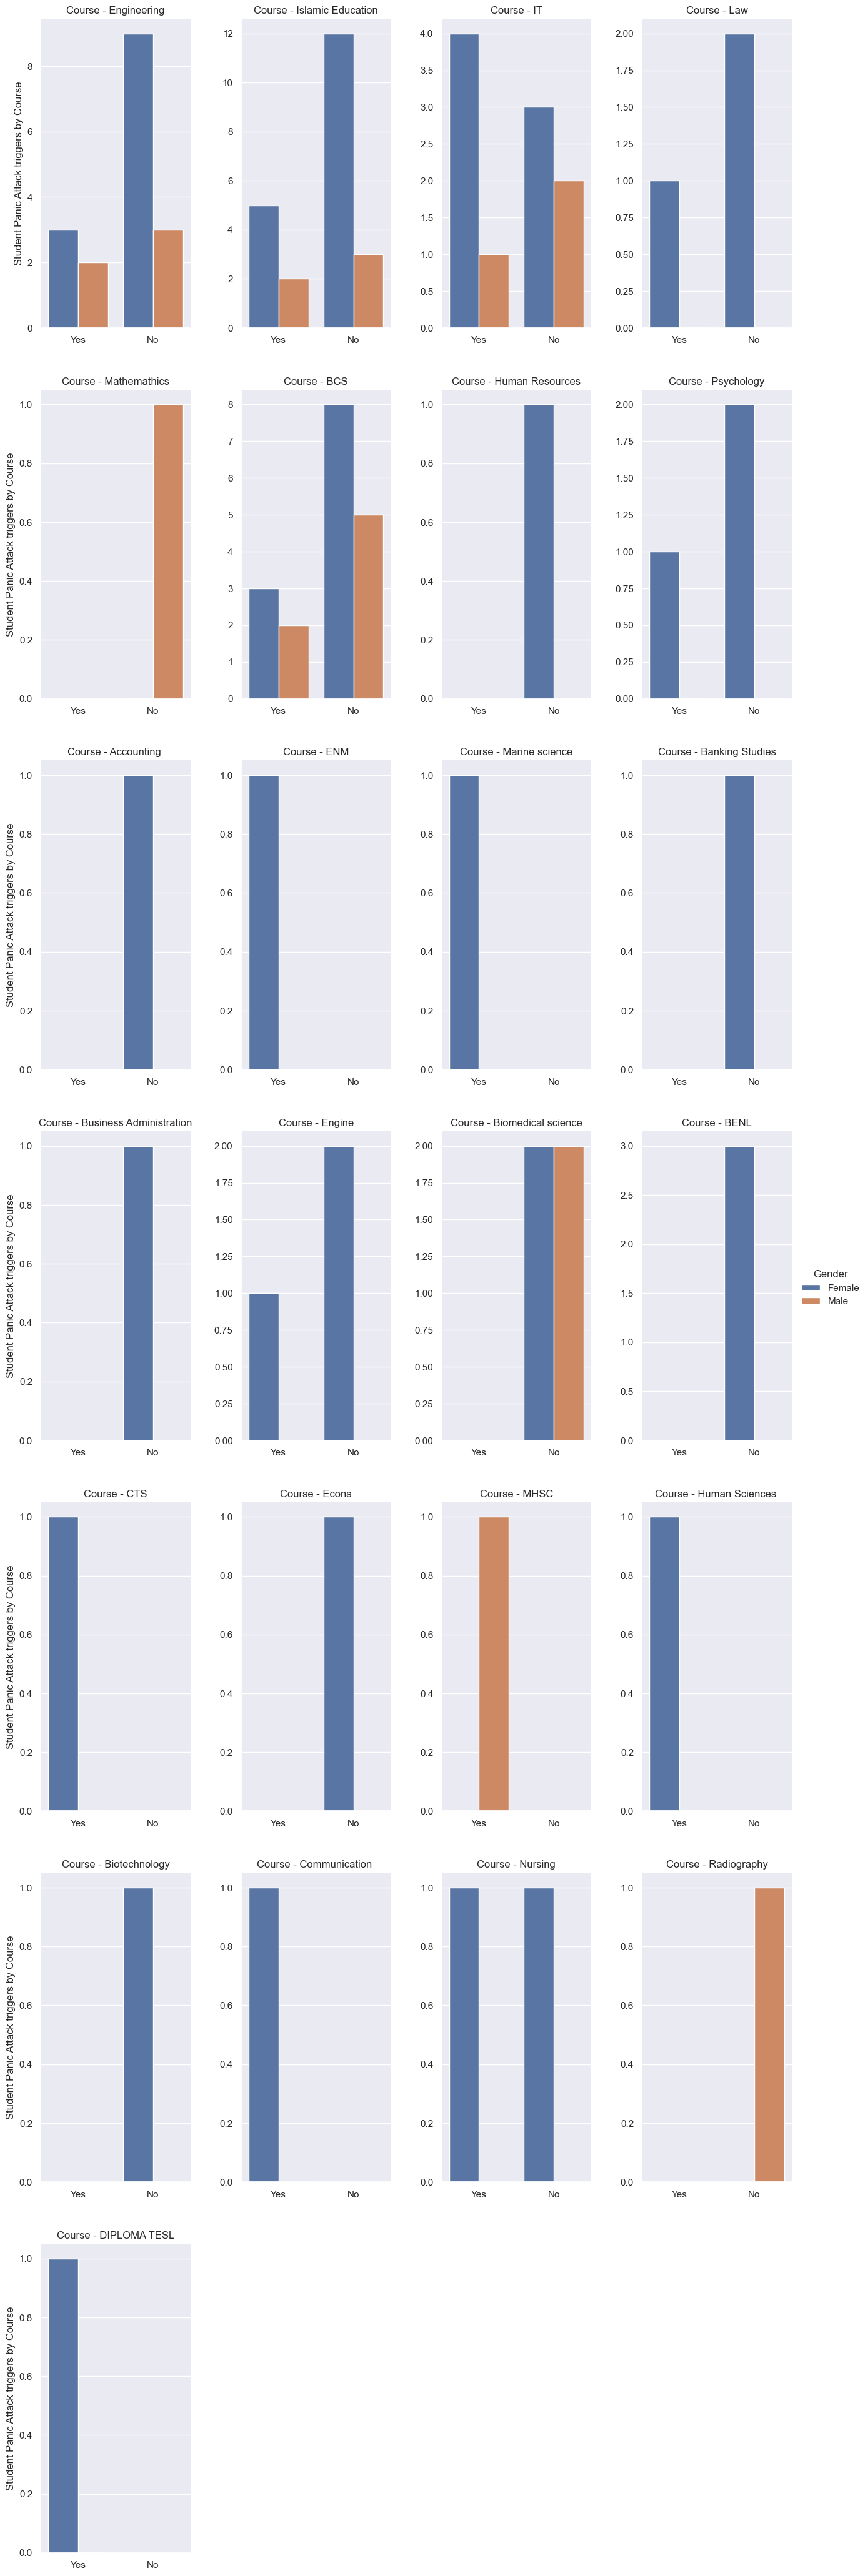

In [27]:
sns.set_theme(style="darkgrid")
ax = sns.catplot(x="Panic Attack", col="Course", col_wrap=4, capsize=.2, 
                hue="Gender", data=df, row_order=8,
                kind="count", sharey=False, height=6.5, aspect=.5) 
(ax.set_axis_labels("", "Student Panic Attack triggers by Course")
  .set_titles("{col_var} - {col_name}")) 
for ax in ax.axes:
    ax.set_xticklabels(['Yes' , 'No'], rotation=0)
    ax.tick_params(labelbottom=True)
plt.subplots_adjust(bottom=0.1, left=0.06, hspace=0.2)
plt.show()

# Output

In [28]:
output = df[(df["Depression"]=='Yes') & (df["Anxiety"]=='Yes') & (df["Panic Attack"]=='Yes')].reset_index(drop=True)

output.drop(output.columns[[0, 6, 11]], axis = 1, inplace = True)
print("Students Most Depressed, Anxiety, and Panic Attacks\n") 
output

Students Most Depressed, Anxiety, and Panic Attacks



,Gender,Age,Course,Current Year,CGPA,Depression,Anxiety,Panic Attack,Treatment
0,Male,19.0,IT,Year 1,3.00 - 3.49,Yes,Yes,Yes,No
1,Female,24.0,ENM,year 4,3.00 - 3.49,Yes,Yes,Yes,No
2,Female,18.0,Marine science,year 2,3.50 - 4.00,Yes,Yes,Yes,No
3,Female,23.0,BCS,Year 3,3.50 - 4.00,Yes,Yes,Yes,No
4,Female,24.0,IT,Year 3,3.50 - 4.00,Yes,Yes,Yes,Yes
5,Female,19.0,IT,year 1,3.00 - 3.49,Yes,Yes,Yes,No
6,Female,19.0,IT,year 1,2.50 - 2.99,Yes,Yes,Yes,No
7,Female,20.0,Islamic Education,year 3,3.00 - 3.49,Yes,Yes,Yes,No
8,Female,24.0,Communication,Year 2,3.50 - 4.00,Yes,Yes,Yes,No
9,Female,18.0,Psychology,year 1,3.50 - 4.00,Yes,Yes,Yes,No
